With No Immunizations

Expected total infected (including Tommy): 32.167
Expected epidemic duration (days): 16.7365


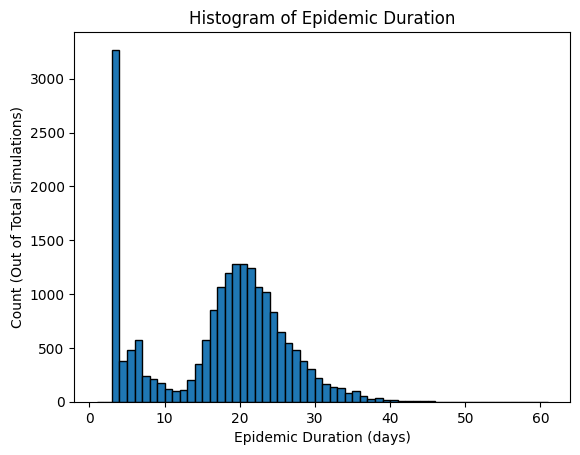

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_kids = 61        # total kids including Tommy
p = 0.01             # infection probability per contact per day
infectious_days = 3  # number of days a kid is infectious
simulations = 20000 # number of simulation runs

def simulate_epidemic():
    # 0 = susceptible, 1 = infected (and infectious), 2 = recovered
    status = np.zeros(num_kids, dtype=int)
    # Tommy starts infected
    status[0] = 1
    # Track days remaining
    days_infectious = np.zeros(num_kids, dtype=int)
    days_infectious[0] = infectious_days

    day = 0
    total_infected_each_day = []

    while np.any(status == 1):
        infectious_kids = np.where(status == 1)[0]
        new_infections = np.zeros(num_kids, dtype=bool)

        for kid in infectious_kids:
            susceptible = np.where(status == 0)[0]
            infections = np.random.rand(len(susceptible)) < p
            new_infections[susceptible] = infections | new_infections[susceptible]

        # Update statuses
        status[new_infections] = 1
        days_infectious[new_infections] = infectious_days
        # Decrease infectious days for all infectious kids
        days_infectious[infectious_kids] -= 1
        # Kids with 0 days left become recovered
        status[(days_infectious == 0) & (status == 1)] = 2

        total_infected_each_day.append(np.sum(status == 1))
        day += 1

    return np.sum(status > 0), len(total_infected_each_day)

# Run multiple simulations
total_infected_list = []
epidemic_durations = []

for _ in range(simulations):
    total_infected, duration = simulate_epidemic()
    total_infected_list.append(total_infected)
    epidemic_durations.append(duration)

# Results
print("Expected total infected (including Tommy):", np.mean(total_infected_list))
print("Expected epidemic duration (days):", np.mean(epidemic_durations))

plt.hist(epidemic_durations, bins=range(1, max(epidemic_durations)+2), edgecolor='black')
plt.xlabel("Epidemic Duration (days)")
plt.ylabel("Count (Out of Total Simulations)")
plt.title("Histogram of Epidemic Duration")
plt.show()


With Immunizations

Expected total infected (including Tommy): 4.23595
Expected epidemic duration (days): 6.7346


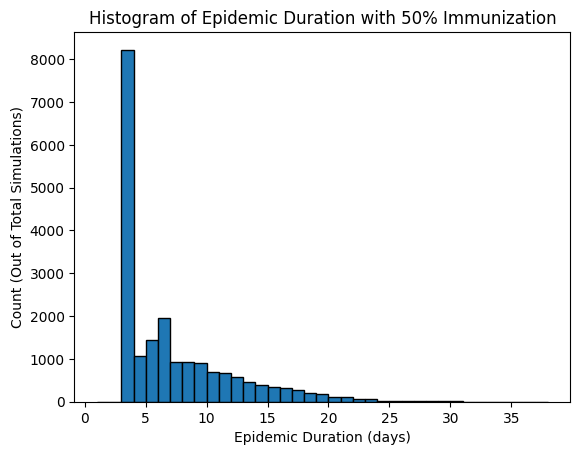

In [3]:
# Parameters
num_kids = 61        # total kids including Tommy
p = 0.01             # infection probability per contact per day
infectious_days = 3  # number of days a kid is infectious
simulations = 20000  # number of simulation runs

def simulate_epidemic_immunized():
    # 0 = susceptible, 1 = infected, 2 = recovered, 3 = immune
    status = np.zeros(num_kids, dtype=int)

    # Each kid has a 50-50 of being immune (excluding Tommy)
    immune_kids = np.random.rand(num_kids-1) < 0.5
    status[1:] = 3 * immune_kids  # 3 = immune

    # Tommy starts infected
    status[0] = 1
    days_infectious = np.zeros(num_kids, dtype=int)
    days_infectious[0] = infectious_days

    total_infected_each_day = []
    day = 0

    while np.any(status == 1):
        infectious_kids = np.where(status == 1)[0]
        new_infections = np.zeros(num_kids, dtype=bool)

        for kid in infectious_kids:
            susceptible = np.where(status == 0)[0]  # only susceptible, not immune
            infections = np.random.rand(len(susceptible)) < p
            new_infections[susceptible] = infections | new_infections[susceptible]

        # Update statuses
        status[new_infections] = 1
        days_infectious[new_infections] = infectious_days

        # Decrease infectious days
        days_infectious[infectious_kids] -= 1
        status[(days_infectious == 0) & (status == 1)] = 2

        total_infected_each_day.append(np.sum(status == 1))
        day += 1

    return np.sum(status == 1) + np.sum(status == 2), len(total_infected_each_day)

# Run multiple simulations
total_infected_list = []
epidemic_durations = []

for _ in range(simulations):
    total_infected, duration = simulate_epidemic_immunized()
    total_infected_list.append(total_infected)
    epidemic_durations.append(duration)

# Results
print("Expected total infected (including Tommy):", np.mean(total_infected_list))
print("Expected epidemic duration (days):", np.mean(epidemic_durations))

plt.hist(epidemic_durations, bins=range(1, max(epidemic_durations)+2), edgecolor='black')
plt.xlabel("Epidemic Duration (days)")
plt.ylabel("Count (Out of Total Simulations)")
plt.title("Histogram of Epidemic Duration with 50% Immunization")
plt.show()
